<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/ML_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
print('Hello World!')

Hello World!


<h2>Machine Learning for Stocks Trading</h2>

Step 1: Getting some historical data.

Libraries or Modules:

Yahoo Finance module.
Create charts
handle dataframes - Pandas
We need datetime functions

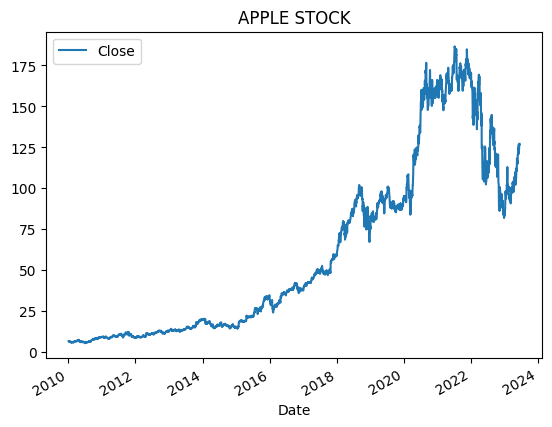

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

#Install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

#Download our Historical Data
# Determine Heiken Ashi signal
#df = yf.download('TSLA',
#df = yf.download('AAPL',
#df = yf.download('^IXIC',
#df = yf.download('^IXIC',
df = yf.download('AMZN',
                 start='2010-01-01',
                 end=date.today(),
                 progress=False,)

#Create a simple chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()

Creating Technical Analysis Indicators and we are going to also plot them

,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low,HA_Signal,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,,,,,,
2010-05-26,6.2525,6.2895,6.1150,6.1605,6.1605,139292000,6.204375,6.08500,6.2895,6.0850,1,44.180837,39.354364,40.137181,-89.242071,-118.356786,-55.656877
2010-05-27,6.2490,6.3425,6.0300,6.3350,6.3350,94954000,6.239125,6.20650,6.3425,6.0300,1,79.761234,50.944331,45.725165,-77.184311,-104.053481,-45.233747
2010-05-28,6.3035,6.3800,6.2005,6.2730,6.2730,79096000,6.289250,6.29200,6.3800,6.2005,0,54.895849,47.204827,44.148299,-65.290563,-90.399646,-34.739743
2010-06-01,6.2485,6.3285,6.1510,6.1620,6.1620,73190000,6.222500,6.28825,6.3285,6.1510,0,25.940166,40.929590,41.395912,-74.269609,-101.771110,-47.990908
2010-06-02,6.2010,6.3215,6.0825,6.3155,6.3155,95294000,6.230125,6.20525,6.3215,6.0825,1,69.880278,51.361356,46.374828,-66.378750,-93.802886,-42.058189


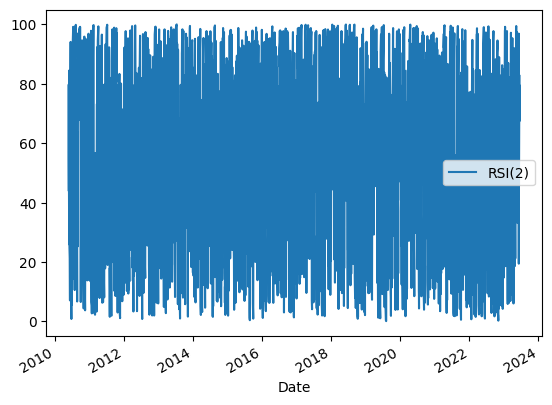

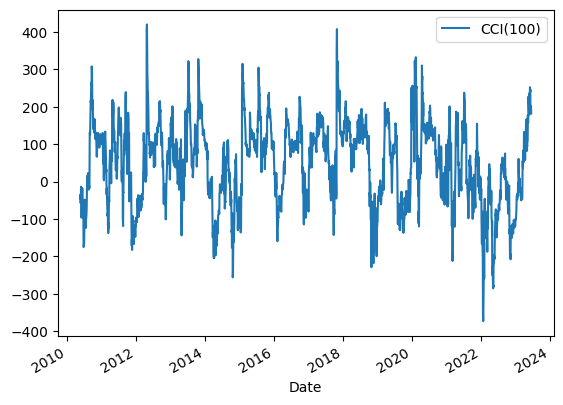

In [122]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

# Calculate Heiken Ashi candles
df['HA_Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['HA_Open'] = (df['Open'].shift(1) + df['Close'].shift(1)) / 2
df['HA_High'] = df[['HA_Open', 'HA_Close', 'High']].max(axis=1)
df['HA_Low'] = df[['HA_Open', 'HA_Close', 'Low']].min(axis=1)

# Determine Heiken Ashi signal
# Determine Heiken Ashi signal
df['HA_Signal'] = np.where(df['HA_Close'] > df['HA_Open'], 1, 0)

#df['HA_Signal'] = np.where(df['HA_Close'] > df['HA_Open'], 'UP', 'DOWN')

df['RSI(2)'] = ta.rsi(df['Close'],length=2)
df['RSI(7)'] = ta.rsi(df['Close'],length=7)
df['RSI(14)'] = ta.rsi(df['Close'],length=14)
df['CCI(30)'] = ta.cci(close=df['Close'],length=30,high=df['High'],low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'],length=50,high=df['High'],low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'],length=100,high=df['High'],low=df['Low'])

#Drop NaN Values
df = df.dropna()

#Create a plot showing some of our indicators
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

#How's our current dataframe going
df.head()

Prepare our data labelling

What do we want to do over here?

When we place our trade: Buy at Open (over the next day).
We want to close our trade: At the next day at open.

Formula:

Handling the returns this ways: Buy: Open(-1) - Closing: Open(-2)

We want to label our data in the following day.

BUY SIGNAL: Open(-2) > Open(-1)

SELL SIGNAL: Open(-2) < Open(-1)

Indicators the current situations, and our labels take a look ahead of time to determine if we have a pattern.

In [123]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,HA_Close,HA_Open,HA_High,HA_Low,HA_Signal,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,,,,,,
2010-05-26,6.2525,6.2895,6.1150,6.1605,6.1605,139292000,6.204375,6.08500,6.2895,6.0850,1,44.180837,39.354364,40.137181,-89.242071,-118.356786,-55.656877,1
2010-05-27,6.2490,6.3425,6.0300,6.3350,6.3350,94954000,6.239125,6.20650,6.3425,6.0300,1,79.761234,50.944331,45.725165,-77.184311,-104.053481,-45.233747,0
2010-05-28,6.3035,6.3800,6.2005,6.2730,6.2730,79096000,6.289250,6.29200,6.3800,6.2005,0,54.895849,47.204827,44.148299,-65.290563,-90.399646,-34.739743,0
2010-06-01,6.2485,6.3285,6.1510,6.1620,6.1620,73190000,6.222500,6.28825,6.3285,6.1510,0,25.940166,40.929590,41.395912,-74.269609,-101.771110,-47.990908,1
2010-06-02,6.2010,6.3215,6.0825,6.3155,6.3155,95294000,6.230125,6.20525,6.3215,6.0825,1,69.880278,51.361356,46.374828,-66.378750,-93.802886,-42.058189,1


Creating a Neural Network

SkLearn

In [124]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#Fitting - Indicators and our Labelling
X = df[df.columns[6:-1]].values
y = df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(' Train Data Accuracy ')
print(classification_report(y_train,predict_train))

print( ' Testing Data Accuracy ' )
print( classification_report(y_test,predict_test) )

 Train Data Accuracy 
              precision    recall  f1-score   support

           0       0.52      0.39      0.44      1094
           1       0.55      0.68      0.61      1206

    accuracy                           0.54      2300
   macro avg       0.54      0.53      0.53      2300
weighted avg       0.54      0.54      0.53      2300

 Testing Data Accuracy 
              precision    recall  f1-score   support

           0       0.46      0.35      0.40       450
           1       0.55      0.66      0.60       537

    accuracy                           0.52       987
   macro avg       0.50      0.50      0.50       987
weighted avg       0.51      0.52      0.50       987



Backtesting our Model

Measure the returns obtained by trading our model

[]

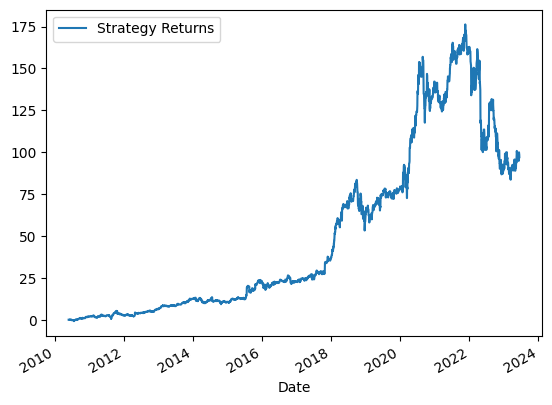

In [125]:
df['Prediction'] = np.append(predict_train,predict_test)
df['Strategy Returns'] = np.where( df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum()

df.plot(y='Strategy Returns')
plt.plot()

In [126]:
prediction = df.iloc[-1]['Prediction']

if prediction=="1":
  print("Today's return forecast: UP")
else:
  print("Today's return forecast: DOWN")

Today's return forecast: DOWN


<h2>Genboxtrading.com</h2>